# Plant Seedlings Classification 



Data Description:
You are provided with a training set and a test set of images of plant seedlings at various stages of grown.
Each image has a filename that is its unique id.
The dataset comprises 12 plant species.

The goal of the competition is to create a classifier capable of determining a plant's species from a photo.

Dataset:
The project is from a dataset from Kaggle.
Link to the Kaggle project site:https://www.kaggle.com/c/plant-seedlings-classification/data

The dataset has to be downloaded from the above Kagglewebsite.

Context:
Can you differentiate a weed from a crop seedling?
The ability to do so effectively can mean better crop yields and better stewardship of the environment.
The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has recently released a dataset containing images of unique plants belonging to 12 species at several growth stages.

Objective:

To implement the techniques learnt as a part of the course.

Learning Outcomes:

Pre-processing of image data.
Visualization of images.
Building CNN.
Evaluate the Model.

# Steps and tasks:


1. Import the libraries, load dataset, print shape of data, visualize the images in dataset.  
2. Data Pre-processing:  
a. Normalization.
b. Gaussian Blurring.
c. Masking
d. Visualize data after pre-processing.
3. Make data compatible:  
a. Split the dataset into training, testing, and validation set.
b. Reshape data into shapes compatible with Keras models.
c. Convert labels from digits to one hot vectors.
d. Print the label for y_train[0].
4. Building CNN:  
a. Define layers.
b. Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)
5. Fit and evaluate model and print confusion matrix.  
6. Submit predictions on the test image on Kaggle. 



# Code
Import libraries, load dataset,data pre-processing, make data compatible

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import pandas as pd
from glob import glob
from matplotlib import pyplot as plt
import itertools

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,Activation,GlobalMaxPool2D,GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam,RMSprop
from keras.utils.np_utils import to_categorical  
from keras.utils import np_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score 

In [3]:
 !wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/7880/862031/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1610181297&Signature=p0zAvDLq8TOzzlt8IbXGsVqY7PbTzyWcn6CgRU571bqMeuYIn3OYkVrj0udTXuetlfCJPkkmwom%2B%2FMyO0hi3rUSEQzVaeQ537DULzChhPScD5PoEhtPC0fK40DkGmIxc9D8N8FFpXVtCd5uNYxgHg35y2cwbZId%2FSdbj0rHpaBbKCDy5o%2BBNkIAXZsUsvERLUPv8xg2tXbqfozp%2FjCoa4hszkNTVSRA6%2FlVSbBHOhIGGtBdTvZUAqZwdCY5m86NZOElQOwCNFJy3XJXZKhfXHx3oN1loI8JBhXEMMc6BhKhJymCEEI%2BlkYPU5%2F%2FLZ3DftPHyvtehkerOexzT6f6dhg%3D%3D&response-content-disposition=attachment%3B+filename%3Dplant-seedlings-classification.zip" -c -O 'plant-seedlings-classification.zip'

--2021-01-06 14:14:24--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/7880/862031/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1610181297&Signature=p0zAvDLq8TOzzlt8IbXGsVqY7PbTzyWcn6CgRU571bqMeuYIn3OYkVrj0udTXuetlfCJPkkmwom%2B%2FMyO0hi3rUSEQzVaeQ537DULzChhPScD5PoEhtPC0fK40DkGmIxc9D8N8FFpXVtCd5uNYxgHg35y2cwbZId%2FSdbj0rHpaBbKCDy5o%2BBNkIAXZsUsvERLUPv8xg2tXbqfozp%2FjCoa4hszkNTVSRA6%2FlVSbBHOhIGGtBdTvZUAqZwdCY5m86NZOElQOwCNFJy3XJXZKhfXHx3oN1loI8JBhXEMMc6BhKhJymCEEI%2BlkYPU5%2F%2FLZ3DftPHyvtehkerOexzT6f6dhg%3D%3D&response-content-disposition=attachment%3B+filename%3Dplant-seedlings-classification.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 66.102.1.128, 142.250.13.128, 74.125.206.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|66.102.1.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1810679877 (1.7G) [application/zip]
Saving to: ‘plant-seedlings-classif

In [4]:
!ls

drive  plant-seedlings-classification.zip  sample_data


In [5]:
# move the downloaded zip to my drive - Data Folder
!mv plant-seedlings-classification.zip "/content/drive/My Drive/Colab Notebooks/Data/plant-seedlings-classification.zip"

In [9]:
# Set the path to the dataset folder. (The dataset contains image folder: "train")
train_path = "/content/drive/My Drive/Colab Notebooks/Data/plant-seedlings-classification.zip"

# Set the path to plant-seedlings-classification.zip after download it using wget
#train_path = "/content/plant-seedlings-classification.zip"

In [7]:
!mkdir temp_train

In [10]:
# Extract the files from dataset to temp_train and temp_test folders (as the dataset is a zip file.)
from zipfile import ZipFile
with ZipFile(train_path, 'r') as zip:
  zip.extractall('./temp_train')

In [11]:
path = "./temp_train/train/*/*.png"  # The path to all images in training set. (* means include all folders and files.)
files = glob(path)

trainImg = [] # Initialize empty list to store the image data as numbers.
trainLabel = [] # Initialize empty list to store the labels of images
j = 1
num = len(files)

# Obtain images and resizing, obtain labels
for img in files:
    '''
    Append the image data to trainImg list.
    Append the labels to trainLabel list.
    '''
    print(str(j) + "/" + str(num), end="\r")
    trainImg.append(cv2.resize(cv2.imread(img), (128, 128)))  # Get image (with resizing to 128x128)
    trainLabel.append(img.split('/')[-2])  # Get image label (folder name contains the class to which the image belong)
    j += 1

trainImg = np.asarray(trainImg)  # Train images set
trainLabel = pd.DataFrame(trainLabel)  # Train labels set

In [12]:
print(trainImg.shape)
print(trainLabel.shape)

(4750, 128, 128, 3)
(4750, 1)


In [13]:
trainLabel[0].value_counts()

Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
Name: 0, dtype: int64

Text(0.5, 1.0, 'Small-flowered Cranesbill')

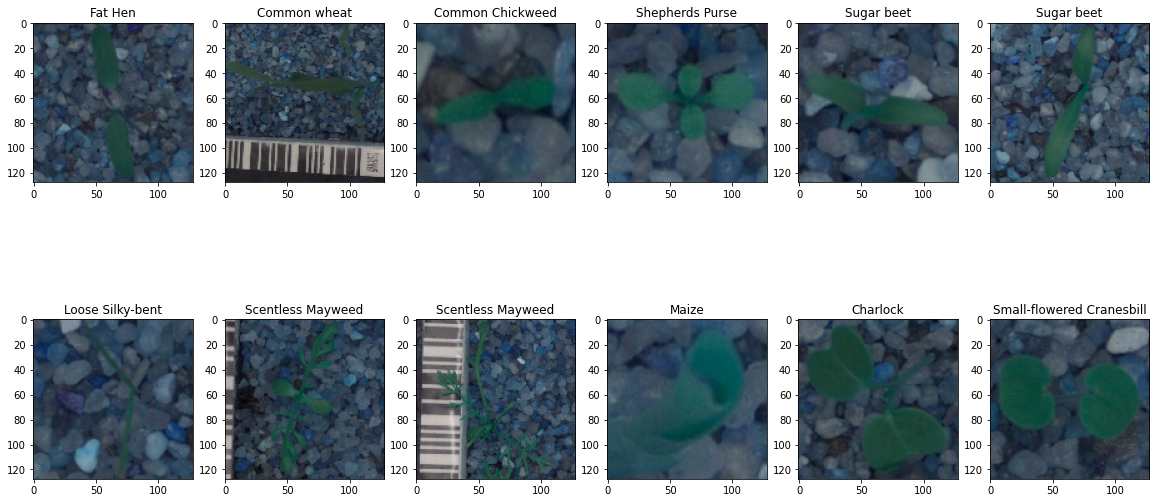

In [14]:
f = plt.figure(figsize=(20, 20))

f.add_subplot(2, 6, 1)
plt.imshow(trainImg[0])
plt.title(trainLabel[0][0])

f.add_subplot(2, 6, 2)
plt.imshow(trainImg[496])
plt.title(trainLabel[0][496])

f.add_subplot(2, 6, 3)
plt.imshow(trainImg[759])
plt.title(trainLabel[0][759])
 
f.add_subplot(2, 6, 4)
plt.imshow(trainImg[1370])
plt.title(trainLabel[0][1370])

f.add_subplot(2, 6, 5)
plt.imshow(trainImg[1755])
plt.title(trainLabel[0][1755])

f.add_subplot(2, 6, 6)
plt.imshow(trainImg[1685])
plt.title(trainLabel[0][1685])

f.add_subplot(1, 6, 1)
plt.imshow(trainImg[2409])
plt.title(trainLabel[0][2409])

f.add_subplot(1, 6, 2)
plt.imshow(trainImg[2630])
plt.title(trainLabel[0][2630])

f.add_subplot(1, 6, 3)
plt.imshow(trainImg[3020])
plt.title(trainLabel[0][3020])
 
f.add_subplot(1, 6, 4)
plt.imshow(trainImg[3251])
plt.title(trainLabel[0][3251])

f.add_subplot(1, 6, 5)
plt.imshow(trainImg[3538])
plt.title(trainLabel[0][3538])

f.add_subplot(1, 6, 6)
plt.imshow(trainImg[4749])
plt.title(trainLabel[0][4749])

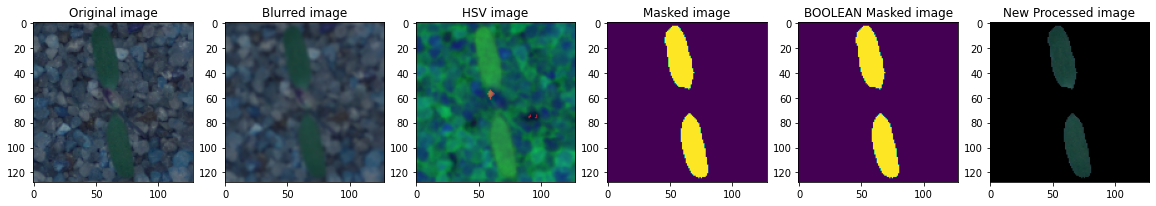

In [15]:
trainImg_new = []
sets = []; getEx = True

for i in trainImg:
    # Blurred image
    blurr = cv2.GaussianBlur(i,(5,5),0)
    # HSV image
    hsv = cv2.cvtColor(blurr,cv2.COLOR_BGR2HSV)

    #Green Parameters
    sensitivity = 35
    lower  = np.array([60 - sensitivity, 100, 50])
    upper = np.array([60 + sensitivity, 255, 255])
    
    #Masked image
    mask = cv2.inRange(hsv,lower,upper)
    struc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    mask = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,struc)
    
    #Boolean image
    boolean = mask>0
    new = np.zeros_like(i,np.uint8)
    new[boolean] = i[boolean]
    trainImg_new.append(new)
    
    if getEx:
        f = plt.figure(figsize=(20, 20))
        f.add_subplot(1,6,1);plt.imshow(i);plt.title('Original image') # Original image
        f.add_subplot(1,6,2);plt.imshow(blurr);plt.title('Blurred image') # Blurred image
        f.add_subplot(1,6,3);plt.imshow(hsv);plt.title('HSV image') # HSV image
        f.add_subplot(1,6,4);plt.imshow(mask);plt.title('Masked image') # Masked image
        f.add_subplot(1,6,5);plt.imshow(boolean);plt.title('BOOLEAN Masked image') # BOOLEAN Masked image
        f.add_subplot(1,6,6);plt.imshow(new);plt.title('New Processed image') # New Processed image
        getEx = False
        
trainImg_new = np.asarray(trainImg_new)


In [16]:
trainImg_new.shape

(4750, 128, 128, 3)

In [17]:
labels = preprocessing.LabelEncoder()
labels.fit(trainLabel[0])
print('Classes'+str(labels.classes_))

Classes['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']


In [18]:
encodedlabel = labels.transform(trainLabel[0])
convertedlabels = np_utils.to_categorical(encodedlabel)
classes = convertedlabels.shape[1]
print(str(classes))

12


In [19]:
# normalization of images
trainImg_new = trainImg_new.astype('float32') / 255.0

In [20]:
X_train,X_test,y_train,y_test = train_test_split(trainImg_new,convertedlabels,test_size=0.3,random_state=38,stratify=convertedlabels)

In [21]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3325, 128, 128, 3)
(3325, 12)
(1425, 128, 128, 3)
(1425, 12)


In [22]:
X_val,X_test_new,y_val,y_test_new = train_test_split(X_test,y_test,test_size=0.5,random_state=38,stratify=y_test)

In [23]:
print(X_val.shape)
print(y_val.shape)
print(X_test_new.shape)
print(y_test_new.shape)

(712, 128, 128, 3)
(712, 12)
(713, 128, 128, 3)
(713, 12)


In [24]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [25]:
labels.classes_[10]

'Small-flowered Cranesbill'

# CNN Model 1


*   2 convolution layers ( filters=64 / 128 , kernel_size=(3, 3) activation='relu')
*   MaxPool2D((2, 2)
*   Dropout(0.25)
*   Flatten
*   2 dense layers (128 / 64, activation='relu')
*   Dropout(0.25)
*   loss='categorical_crossentropy', optimizer='adam'
*   model compile with ImageDataGenerator to minimize overfitting.
*   shuffle = True 








In [ ]:
generator = ImageDataGenerator(rotation_range = 180,
                               zoom_range = 0.2,
                               width_shift_range = 0.2,
                               height_shift_range = 0.2,
                               horizontal_flip = True,
                               vertical_flip = True)
generator.fit(X_train)

In [ ]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(128, 128, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 115200)            0

In [ ]:
history = model.fit(generator.flow(X_train,y_train,batch_size=64),epochs=200, verbose=2,shuffle=True,validation_data=(X_val,y_val))
pd.DataFrame(history.history)

Epoch 1/200
52/52 - 18s - loss: 2.2781 - accuracy: 0.2214 - val_loss: 1.8886 - val_accuracy: 0.4593
Epoch 2/200
52/52 - 11s - loss: 1.8952 - accuracy: 0.3456 - val_loss: 1.6334 - val_accuracy: 0.4803
Epoch 3/200
52/52 - 11s - loss: 1.7180 - accuracy: 0.3964 - val_loss: 1.3603 - val_accuracy: 0.5562
Epoch 4/200
52/52 - 11s - loss: 1.5854 - accuracy: 0.4343 - val_loss: 1.3386 - val_accuracy: 0.5407
Epoch 5/200
52/52 - 11s - loss: 1.5433 - accuracy: 0.4559 - val_loss: 1.2449 - val_accuracy: 0.5913
Epoch 6/200
52/52 - 11s - loss: 1.4937 - accuracy: 0.4734 - val_loss: 1.2101 - val_accuracy: 0.6039
Epoch 7/200
52/52 - 11s - loss: 1.4602 - accuracy: 0.4896 - val_loss: 1.1814 - val_accuracy: 0.5857
Epoch 8/200
52/52 - 11s - loss: 1.4154 - accuracy: 0.4935 - val_loss: 1.1784 - val_accuracy: 0.5997
Epoch 9/200
52/52 - 11s - loss: 1.3656 - accuracy: 0.5185 - val_loss: 1.1217 - val_accuracy: 0.6362
Epoch 10/200
52/52 - 11s - loss: 1.3162 - accuracy: 0.5356 - val_loss: 1.1268 - val_accuracy: 0.6250

,loss,accuracy,val_loss,val_accuracy
0,2.278075,0.221353,1.888568,0.459270
1,1.895151,0.345564,1.633406,0.480337
2,1.718030,0.396391,1.360323,0.556180
3,1.585363,0.434286,1.338648,0.540730
4,1.543257,0.455940,1.244944,0.591292
...,...,...,...,...
195,0.375927,0.867970,0.357835,0.879214
196,0.365669,0.865865,0.364816,0.863764
197,0.372164,0.856541,0.398813,0.870786
198,0.378967,0.861654,0.342551,0.893258


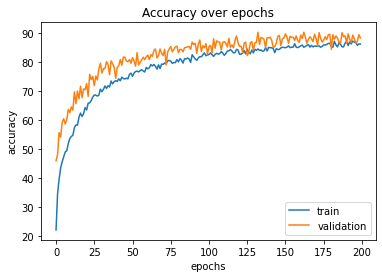

In [ ]:
plt.plot(np.array(history.history['accuracy']) * 100)
plt.plot(np.array(history.history['val_accuracy']) * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.title('Accuracy over epochs')
plt.show()

In [ ]:
scores = model.evaluate(X_test_new, y_test_new)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


23/23 [==============================] - 0s 11ms/step - loss: 0.4332 - accuracy: 0.8443
Test loss: 0.43317079544067383
Test accuracy: 0.844319760799408


In [ ]:
# confusion matrix function

def plot_confusion_matrix(cm, classes, normalize=False,title='Confusion matrix',cmap=plt.cm.Greens):
    
    fig = plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

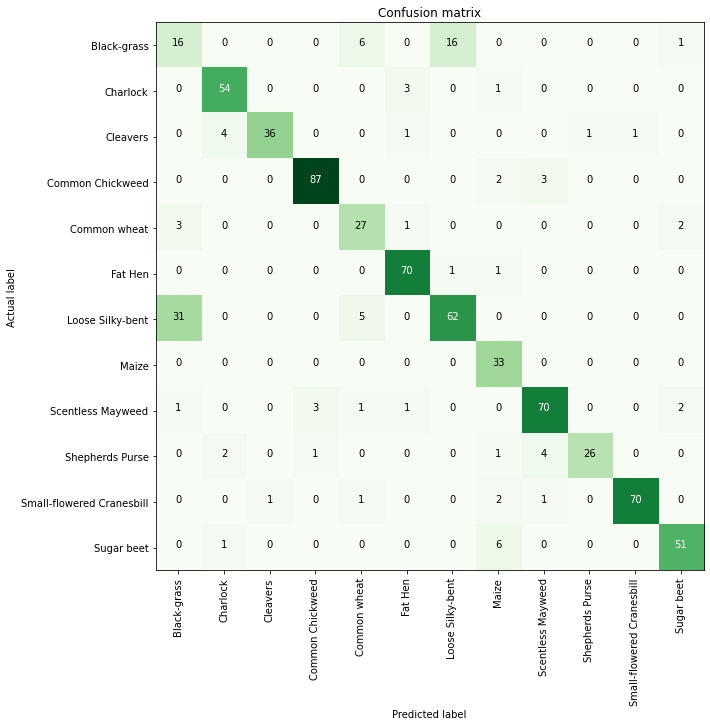

In [ ]:
# Predict the values from the test data
y_pred = model.predict(X_test_new)
y_pred_Classes = np.argmax(y_pred, axis = 1) 
trueY = np.argmax(y_test_new, axis = 1) 

# confusion matrix
confusionMTX = confusion_matrix(trueY, y_pred_Classes) 

# plot the confusion matrix
plot_confusion_matrix(confusionMTX, classes = labels.classes_) 

In [ ]:
#Final score and accuracy of the model

score, acc = model.evaluate(X_test_new,y_test_new)
score1, acc1 = model.evaluate(X_train,y_train)
print('Test score:', score,'   Test accuracy:', acc)
print('Train score:', score1,'   Train accuracy:',acc1)

104/104 [==============================] - 1s 10ms/step - loss: 0.3391 - accuracy: 0.8680
Test score: 0.43317079544067383    Test accuracy: 0.844319760799408
Train score: 0.3390771448612213    Train accuracy: 0.8679699301719666


Model with training accuracy of 86% while testing accuracy 84%. 


In [ ]:
test_images_path = "./temp_train/test/*.png"


test_images = glob(test_images_path)
test_images_arr = []
test_files = []

for img in test_images:
    test_images_arr.append(cv2.resize(cv2.imread(img), (128, 128)))
    test_files.append(img.split('/')[-1])

test_X = np.asarray(test_images_arr)

# Normalization of the Image Data
test_X = test_X.astype('float32') / 255

In [ ]:
 test_X

array([], dtype=float32)

In [ ]:
predictions = model.predict(test_X)
preds = np.argmax(predictions, axis=1)
pred_str = labels.classes_[preds]

In [ ]:
final_predictions = {'file':test_files, 'species':pred_str}
final_predictions = pd.DataFrame(final_predictions)
final_predictions.to_csv("./temp_train/submission.csv", index=False)

# CNN Model 2 

*   3 convolution layers (filters=64/128/128 , kernel_size=(3, 3) activation='relu')
*   MaxPool2D((2, 2),
*   Dropout(0.25)
*   Flatten
*   1 dense layer (256, activation='relu')
*   Dropout(0.5)
*   loss='categorical_crossentropy', optimizer='adam'
*   model compile with ImageDataGenerator to minimize overfitting.
*   shuffle = True 


In [ ]:
generator = ImageDataGenerator(rotation_range = 180,
                               zoom_range = 0.2,
                               width_shift_range = 0.2,
                               height_shift_range = 0.2,
                               horizontal_flip = True,
                               vertical_flip = True)
generator.fit(X_train)

In [37]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(128, 128, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 63, 63, 64)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 61, 61, 128)       73856     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 30, 30, 128)       0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 128)      

In [38]:
history = model.fit(generator.flow(X_train,y_train,batch_size=64),epochs=100, verbose=2,shuffle=True,validation_data=(X_val,y_val))
pd.DataFrame(history.history)

Epoch 1/100
52/52 - 13s - loss: 2.1556 - accuracy: 0.2493 - val_loss: 1.6417 - val_accuracy: 0.4522
Epoch 2/100
52/52 - 12s - loss: 1.6808 - accuracy: 0.4211 - val_loss: 1.4482 - val_accuracy: 0.4775
Epoch 3/100
52/52 - 12s - loss: 1.5420 - accuracy: 0.4659 - val_loss: 1.2359 - val_accuracy: 0.6110
Epoch 4/100
52/52 - 11s - loss: 1.4150 - accuracy: 0.5008 - val_loss: 1.1880 - val_accuracy: 0.6067
Epoch 5/100
52/52 - 11s - loss: 1.3597 - accuracy: 0.5275 - val_loss: 1.0419 - val_accuracy: 0.6643
Epoch 6/100
52/52 - 11s - loss: 1.2718 - accuracy: 0.5564 - val_loss: 1.0869 - val_accuracy: 0.6348
Epoch 7/100
52/52 - 11s - loss: 1.2332 - accuracy: 0.5714 - val_loss: 0.9450 - val_accuracy: 0.7022
Epoch 8/100
52/52 - 11s - loss: 1.1616 - accuracy: 0.6084 - val_loss: 0.9496 - val_accuracy: 0.6882
Epoch 9/100
52/52 - 11s - loss: 1.1264 - accuracy: 0.6156 - val_loss: 1.2726 - val_accuracy: 0.5969
Epoch 10/100
52/52 - 11s - loss: 1.0395 - accuracy: 0.6412 - val_loss: 0.8845 - val_accuracy: 0.6994

,loss,accuracy,val_loss,val_accuracy
0,2.155580,0.249323,1.641651,0.452247
1,1.680795,0.421053,1.448174,0.477528
2,1.542041,0.465865,1.235856,0.610955
3,1.415002,0.500752,1.188010,0.606742
4,1.359720,0.527519,1.041868,0.664326
...,...,...,...,...
95,0.390513,0.864962,0.367320,0.862360
96,0.353744,0.874586,0.313561,0.889045
97,0.344630,0.872180,0.249797,0.901685
98,0.342750,0.871880,0.283300,0.894663


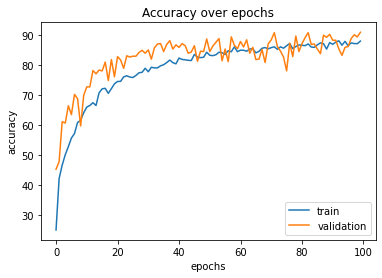

In [39]:
plt.plot(np.array(history.history['accuracy']) * 100)
plt.plot(np.array(history.history['val_accuracy']) * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.title('Accuracy over epochs')
plt.show()

In [40]:
scores = model.evaluate(X_test_new, y_test_new)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


23/23 [==============================] - 0s 10ms/step - loss: 0.3350 - accuracy: 0.8752
Test loss: 0.33500605821609497
Test accuracy: 0.8751752972602844


In [41]:
# confusion matrix function

def plot_confusion_matrix(cm, classes, normalize=False,title='Confusion matrix',cmap=plt.cm.Greens):
    
    fig = plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

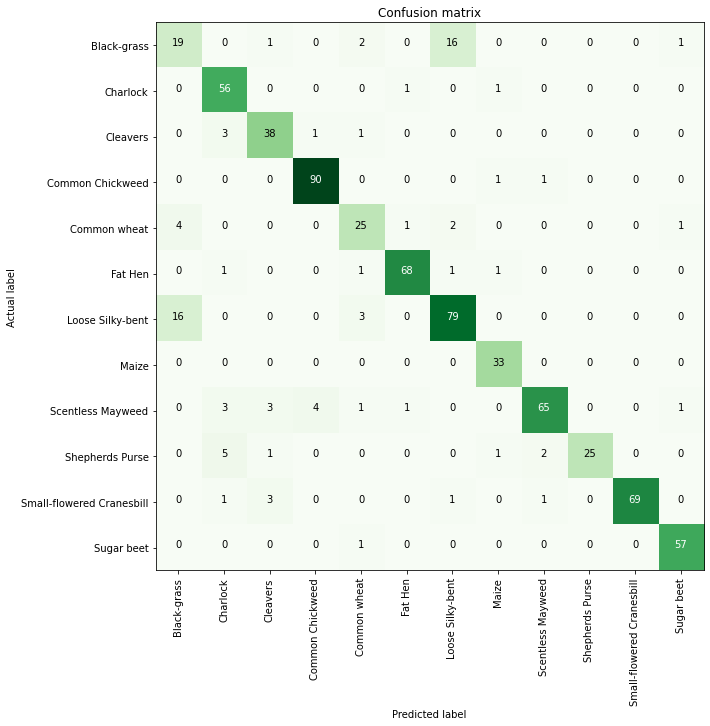

In [42]:
# Predict the values from the test data
y_pred = model.predict(X_test_new)
y_pred_Classes = np.argmax(y_pred, axis = 1) 
trueY = np.argmax(y_test_new, axis = 1) 

# confusion matrix
confusionMTX = confusion_matrix(trueY, y_pred_Classes) 

# plot the confusion matrix
plot_confusion_matrix(confusionMTX, classes = labels.classes_) 

In [43]:
#Final score and accuracy of the model

score, acc = model.evaluate(X_test_new,y_test_new)
score1, acc1 = model.evaluate(X_train,y_train)
print('Test score:', score,'   Test accuracy:', acc)
print('Train score:', score1,'   Train accuracy:',acc1)

104/104 [==============================] - 1s 11ms/step - loss: 0.2567 - accuracy: 0.9029
Test score: 0.33500605821609497    Test accuracy: 0.8751752972602844
Train score: 0.2566973865032196    Train accuracy: 0.9028571248054504


In [45]:
test_images_path = "./temp_train/test/*.png"

test_images = glob(test_images_path)
test_images_arr = []
test_files = []

for img in test_images:

    i = cv2.resize(cv2.imread(img), (128, 128))
    test_files.append(img.split('/')[-1])

    # Blurred image
    blurr = cv2.GaussianBlur(i,(5,5),0)

    # HSV image
    hsv = cv2.cvtColor(blurr,cv2.COLOR_BGR2HSV)

    #Green Parameters
    sensitivity = 35
    lower  = np.array([60 - sensitivity, 100, 50])
    upper = np.array([60 + sensitivity, 255, 255])
    
    #Masked image
    mask = cv2.inRange(hsv,lower,upper)
    struc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    mask = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,struc)
    
    #Boolean image
    boolean = mask>0
    new = np.zeros_like(i,np.uint8)
    new[boolean] = i[boolean]
    test_images_arr.append(new)

test_X = np.asarray(test_images_arr)

# Normalization of the Image Data
test_X = test_X.astype('float32') / 255

In [46]:
predictions = model.predict(test_X)
preds = np.argmax(predictions, axis=1)
pred_str = labels.classes_[preds]

In [47]:
final_predictions = {'file':test_files, 'species':pred_str}
final_predictions = pd.DataFrame(final_predictions)
final_predictions.to_csv("./temp_train/submission.csv", index=False)

Model 2 has 90% on training accuracy and 87 %  on testing accuracy.  




# CNN Model 3 - VGG16
*   Flatten
*   2 dense layers (256, activation='relu')
*   Dropout(0.5)
*   loss='categorical_crossentropy', optimizer='adam'
*   model compile with ImageDataGenerator to minimize overfitting.
*   shuffle = True 


In [21]:
generator = ImageDataGenerator(rotation_range = 180,
                               zoom_range = 0.2,
                               width_shift_range = 0.2,
                               height_shift_range = 0.2,
                               horizontal_flip = True,
                               vertical_flip = True)
generator.fit(X_train)

In [22]:
from keras.applications.vgg16 import VGG16

# initialize the VGG-16 model
# remove the final layer of the model and add 12 classess of plant seedlings
# input images: 128px by 128px.

prior_model = VGG16(weights='imagenet',include_top=False, input_shape=(128,128,3))

# lets create our model

model = Sequential()

# and here we add a all the VGG16 as a layer

model.add(prior_model)



58892288/58889256 [==============================] - 0s 0us/step


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
Total params: 14,714,688
Trainable params: 14,714,688
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.layers[0].summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [25]:
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(12, activation='softmax'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)                3084      
Total params: 16,815,180
Trainable params: 16,815,180
Non-trainable params: 0
_________________________________________________________________


In [27]:
for layers in model.layers[0].layers: # looping over each layers in layer 0 to freeze them
  layers.trainable = False

model.layers[0].trainable = False # freezing layer 0 as well for good measure

In [29]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
history = model.fit(generator.flow(X_train,y_train,batch_size=64),epochs=200, verbose=2,shuffle=True,validation_data=(X_val,y_val))
pd.DataFrame(history.history)

Epoch 1/200
52/52 - 24s - loss: 1.8689 - accuracy: 0.3847 - val_loss: 1.1031 - val_accuracy: 0.6601
Epoch 2/200
52/52 - 13s - loss: 1.2902 - accuracy: 0.5426 - val_loss: 0.8552 - val_accuracy: 0.7163
Epoch 3/200
52/52 - 14s - loss: 1.0977 - accuracy: 0.6168 - val_loss: 0.7276 - val_accuracy: 0.7654
Epoch 4/200
52/52 - 13s - loss: 0.9804 - accuracy: 0.6617 - val_loss: 0.6215 - val_accuracy: 0.7879
Epoch 5/200
52/52 - 13s - loss: 0.9492 - accuracy: 0.6674 - val_loss: 0.6194 - val_accuracy: 0.7921
Epoch 6/200
52/52 - 13s - loss: 0.9184 - accuracy: 0.6770 - val_loss: 0.6189 - val_accuracy: 0.7978
Epoch 7/200
52/52 - 13s - loss: 0.8635 - accuracy: 0.6977 - val_loss: 0.5584 - val_accuracy: 0.8146
Epoch 8/200
52/52 - 13s - loss: 0.8213 - accuracy: 0.7092 - val_loss: 0.5303 - val_accuracy: 0.8315
Epoch 9/200
52/52 - 13s - loss: 0.7980 - accuracy: 0.7167 - val_loss: 0.5110 - val_accuracy: 0.8272
Epoch 10/200
52/52 - 13s - loss: 0.8029 - accuracy: 0.7257 - val_loss: 0.5003 - val_accuracy: 0.8230

,loss,accuracy,val_loss,val_accuracy
0,1.868902,0.384662,1.103076,0.660112
1,1.290234,0.542556,0.855174,0.716292
2,1.097710,0.616842,0.727630,0.765449
3,0.980440,0.661654,0.621531,0.787921
4,0.949196,0.667368,0.619381,0.792135
...,...,...,...,...
195,0.459885,0.824060,0.394596,0.867977
196,0.489289,0.826165,0.379294,0.876405
197,0.508130,0.811128,0.387589,0.870786
198,0.515903,0.812632,0.366864,0.872191


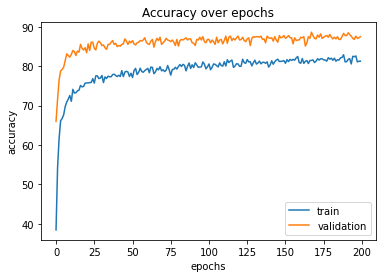

In [31]:
plt.plot(np.array(history.history['accuracy']) * 100)
plt.plot(np.array(history.history['val_accuracy']) * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.title('Accuracy over epochs')
plt.show()

In [32]:
scores = model.evaluate(X_test_new, y_test_new)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

23/23 [==============================] - 1s 60ms/step - loss: 0.3963 - accuracy: 0.8555
Test loss: 0.3962831199169159
Test accuracy: 0.8555399775505066


In [34]:
# confusion matrix function

def plot_confusion_matrix(cm, classes, normalize=False,title='Confusion matrix',cmap=plt.cm.Greens):
    
    fig = plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

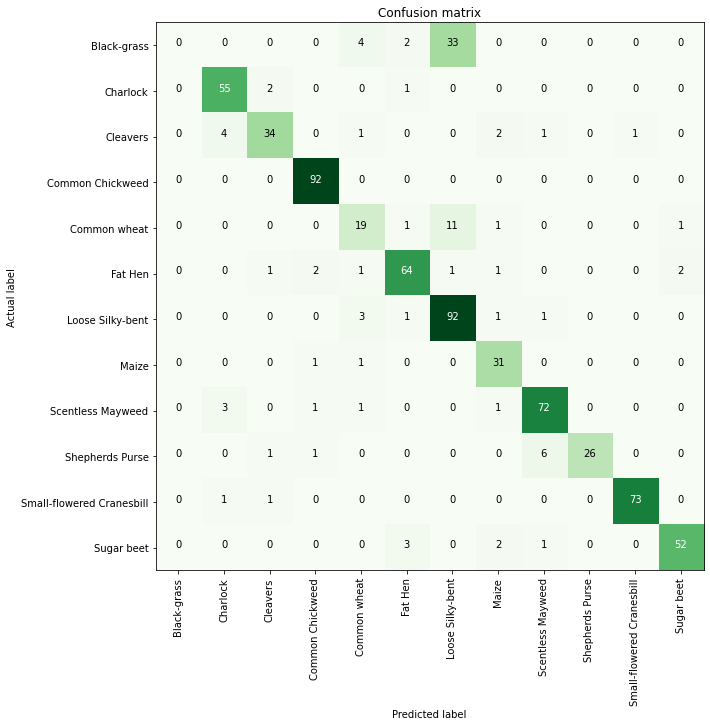

In [35]:
# Predict the values from the test data
y_pred = model.predict(X_test_new)
y_pred_Classes = np.argmax(y_pred, axis = 1) 
trueY = np.argmax(y_test_new, axis = 1) 

# confusion matrix
confusionMTX = confusion_matrix(trueY, y_pred_Classes) 

# plot the confusion matrix
plot_confusion_matrix(confusionMTX, classes = labels.classes_) 

In [36]:
#Final score and accuracy of the model

score, acc = model.evaluate(X_test_new,y_test_new)
score1, acc1 = model.evaluate(X_train,y_train)
print('Test score:', score,'   Test accuracy:', acc)
print('Train score:', score1,'   Train accuracy:',acc1)

104/104 [==============================] - 5s 48ms/step - loss: 0.2729 - accuracy: 0.8878
Test score: 0.3962831199169159    Test accuracy: 0.8555399775505066
Train score: 0.2728801369667053    Train accuracy: 0.8878195285797119


In [37]:
test_images_path = "./temp_train/test/*.png"

test_images = glob(test_images_path)
test_images_arr = []
test_files = []

for img in test_images:

    i = cv2.resize(cv2.imread(img), (128, 128))
    test_files.append(img.split('/')[-1])

    # Blurred image
    blurr = cv2.GaussianBlur(i,(5,5),0)

    # HSV image
    hsv = cv2.cvtColor(blurr,cv2.COLOR_BGR2HSV)

    #Green Parameters
    sensitivity = 35
    lower  = np.array([60 - sensitivity, 100, 50])
    upper = np.array([60 + sensitivity, 255, 255])
    
    #Masked image
    mask = cv2.inRange(hsv,lower,upper)
    struc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    mask = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,struc)
    
    #Boolean image
    boolean = mask>0
    new = np.zeros_like(i,np.uint8)
    new[boolean] = i[boolean]
    test_images_arr.append(new)

test_X = np.asarray(test_images_arr)

# Normalization of the Image Data
test_X = test_X.astype('float32') / 255

In [38]:
predictions = model.predict(test_X)
preds = np.argmax(predictions, axis=1)
pred_str = labels.classes_[preds]

In [39]:
final_predictions = {'file':test_files, 'species':pred_str}
final_predictions = pd.DataFrame(final_predictions)
final_predictions.to_csv("./temp_train/submission.csv", index=False)

Model 3 has 88.7% on training accuracy and 85.5% on testing accuracy.

# CNN Model 4 - InceptionV3

*   Flatten
*   2 dense layers (1024, activation='relu')
*   Dropout(0.5)
*   loss='categorical_crossentropy', optimizer='adam'
*   model compile with ImageDataGenerator to minimize overfitting.
*   shuffle = True 


In [50]:
from keras.applications.inception_v3 import InceptionV3

# initialize the InceptionV3 model
# remove the final layer of the model and add 12 classess of plant seedlings
# input images: 128px by 128px.

prior_model = InceptionV3(weights='imagenet',include_top=False, input_shape=(128,128,3))

# lets create our model

model = Sequential()

# and here we add a all the InceptionV3 as a layer

model.add(prior_model)


In [51]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 2, 2, 2048)        21802784  
Total params: 21,802,784
Trainable params: 21,768,352
Non-trainable params: 34,432
_________________________________________________________________


In [52]:
model.layers[0].summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 63, 63, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 63, 63, 32)   96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 63, 63, 32)   0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

In [53]:
model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(classes, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 2, 2, 2048)        21802784  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              8389632   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 12)                12300     
Total params: 30,204,716
Trainable params: 30,170,284
Non-trainable params: 34,432
_________________________________________________________________


In [54]:
for layers in model.layers[0].layers: # looping over each layers in layer 0 to freeze them
  layers.trainable = False

model.layers[0].trainable = False # freezing layer 0 as well for good measure

In [55]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [56]:
history = model.fit(generator.flow(X_train,y_train,batch_size=64),epochs=200, verbose=2,shuffle=True,validation_data=(X_val,y_val))
pd.DataFrame(history.history)

Epoch 1/200
52/52 - 17s - loss: 5.2485 - accuracy: 0.4192 - val_loss: 0.9748 - val_accuracy: 0.6784
Epoch 2/200
52/52 - 12s - loss: 1.2898 - accuracy: 0.5744 - val_loss: 0.8978 - val_accuracy: 0.6882
Epoch 3/200
52/52 - 12s - loss: 1.1746 - accuracy: 0.6000 - val_loss: 0.7930 - val_accuracy: 0.7261
Epoch 4/200
52/52 - 12s - loss: 1.0869 - accuracy: 0.6156 - val_loss: 0.7837 - val_accuracy: 0.7219
Epoch 5/200
52/52 - 12s - loss: 1.0337 - accuracy: 0.6343 - val_loss: 0.7207 - val_accuracy: 0.7472
Epoch 6/200
52/52 - 12s - loss: 1.0272 - accuracy: 0.6493 - val_loss: 0.7542 - val_accuracy: 0.7430
Epoch 7/200
52/52 - 12s - loss: 1.0658 - accuracy: 0.6322 - val_loss: 0.7967 - val_accuracy: 0.7163
Epoch 8/200
52/52 - 12s - loss: 0.9811 - accuracy: 0.6638 - val_loss: 0.6931 - val_accuracy: 0.7640
Epoch 9/200
52/52 - 12s - loss: 0.9919 - accuracy: 0.6580 - val_loss: 0.7204 - val_accuracy: 0.7331
Epoch 10/200
52/52 - 12s - loss: 0.9598 - accuracy: 0.6668 - val_loss: 0.7761 - val_accuracy: 0.7402

,loss,accuracy,val_loss,val_accuracy
0,5.248538,0.419248,0.974785,0.678371
1,1.289837,0.574436,0.897842,0.688202
2,1.174638,0.600000,0.793037,0.726124
3,1.086906,0.615639,0.783673,0.721910
4,1.033699,0.634286,0.720742,0.747191
...,...,...,...,...
195,0.699586,0.758496,0.622565,0.808989
196,0.711107,0.749173,0.560697,0.828652
197,0.701818,0.753985,0.587399,0.828652
198,0.715191,0.751579,0.539885,0.831461


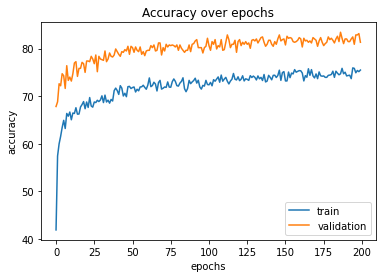

In [57]:
plt.plot(np.array(history.history['accuracy']) * 100)
plt.plot(np.array(history.history['val_accuracy']) * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.title('Accuracy over epochs')
plt.show()

In [58]:
scores = model.evaluate(X_test_new, y_test_new)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

23/23 [==============================] - 1s 41ms/step - loss: 0.5592 - accuracy: 0.8107
Test loss: 0.5592383146286011
Test accuracy: 0.8106591701507568


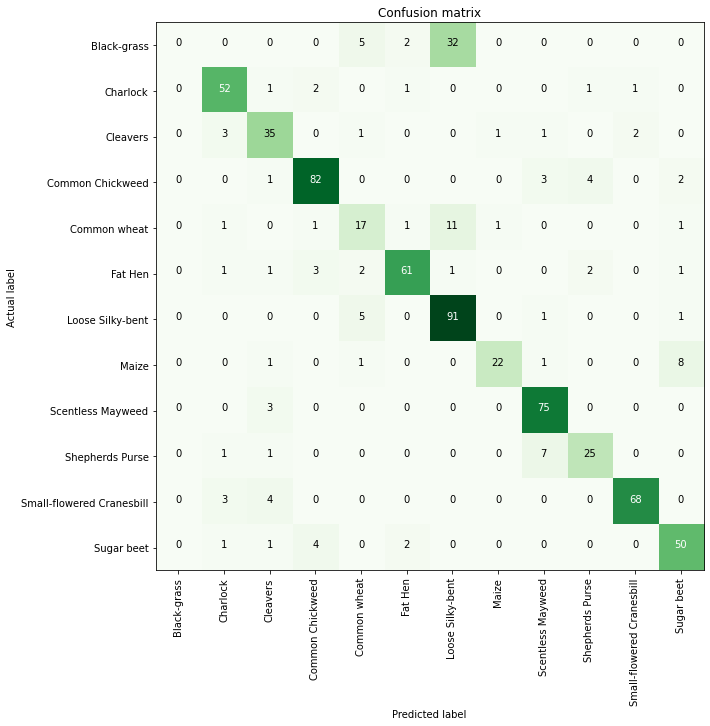

In [59]:
# Predict the values from the test data
y_pred = model.predict(X_test_new)
y_pred_Classes = np.argmax(y_pred, axis = 1) 
trueY = np.argmax(y_test_new, axis = 1) 

# confusion matrix
confusionMTX = confusion_matrix(trueY, y_pred_Classes) 

# plot the confusion matrix
plot_confusion_matrix(confusionMTX, classes = labels.classes_) 

In [60]:
#Final score and accuracy of the model

score, acc = model.evaluate(X_test_new,y_test_new)
score1, acc1 = model.evaluate(X_train,y_train)
print('Test score:', score,'   Test accuracy:', acc)
print('Train score:', score1,'   Train accuracy:',acc1)


104/104 [==============================] - 3s 30ms/step - loss: 0.4418 - accuracy: 0.8328
Test score: 0.5592383146286011    Test accuracy: 0.8106591701507568
Train score: 0.44175833463668823    Train accuracy: 0.832781970500946


In [61]:
test_images_path = "./temp_train/test/*.png"

test_images = glob(test_images_path)
test_images_arr = []
test_files = []

for img in test_images:

    i = cv2.resize(cv2.imread(img), (128, 128))
    test_files.append(img.split('/')[-1])

    # Blurred image
    blurr = cv2.GaussianBlur(i,(5,5),0)

    # HSV image
    hsv = cv2.cvtColor(blurr,cv2.COLOR_BGR2HSV)

    #Green Parameters
    sensitivity = 35
    lower  = np.array([60 - sensitivity, 100, 50])
    upper = np.array([60 + sensitivity, 255, 255])
    
    #Masked image
    mask = cv2.inRange(hsv,lower,upper)
    struc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    mask = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,struc)
    
    #Boolean image
    boolean = mask>0
    new = np.zeros_like(i,np.uint8)
    new[boolean] = i[boolean]
    test_images_arr.append(new)

test_X = np.asarray(test_images_arr)

# Normalization of the Image Data
test_X = test_X.astype('float32') / 255


In [62]:
predictions = model.predict(test_X)
preds = np.argmax(predictions, axis=1)
pred_str = labels.classes_[preds]

final_predictions = {'file':test_files, 'species':pred_str}
final_predictions = pd.DataFrame(final_predictions)
final_predictions.to_csv("./temp_train/submission.csv", index=False)


Model 4 has 90% on training accuracy and 84% on testing accuracy.
 

# CNN Model 5

*   4 convolution layers (filters=64/64/128/256, kernel_size=(3, 3) activation='relu')
*   MaxPool2D((2, 2) 
*   Dropout(0.25)
*   GlobalMaxPool2D
*   Flatten
*   2 dense layers (256 / 256, activation='relu')
*   Dropout(0.25)
*   loss='categorical_crossentropy', optimizer='adam'
*   model compile with ImageDataGenerator to minimize overfitting.
*   shuffle = True 


In [79]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(128, 128, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.25))

model.add(GlobalMaxPool2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_196 (Conv2D)          (None, 126, 126, 64)      1792      
_________________________________________________________________
conv2d_197 (Conv2D)          (None, 124, 124, 64)      36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_198 (Conv2D)          (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 30, 30, 128)       0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 30, 30, 128)      

In [80]:
history = model.fit(generator.flow(X_train,y_train,batch_size=64),epochs=200, verbose=2,shuffle=True,validation_data=(X_val,y_val))
pd.DataFrame(history.history)

Epoch 1/200
52/52 - 14s - loss: 2.2546 - accuracy: 0.2126 - val_loss: 2.0914 - val_accuracy: 0.2556
Epoch 2/200
52/52 - 13s - loss: 1.8656 - accuracy: 0.3218 - val_loss: 1.7815 - val_accuracy: 0.3708
Epoch 3/200
52/52 - 13s - loss: 1.7500 - accuracy: 0.3699 - val_loss: 1.7298 - val_accuracy: 0.4368
Epoch 4/200
52/52 - 13s - loss: 1.6216 - accuracy: 0.4090 - val_loss: 1.5868 - val_accuracy: 0.4438
Epoch 5/200
52/52 - 13s - loss: 1.4947 - accuracy: 0.4641 - val_loss: 1.5175 - val_accuracy: 0.4747
Epoch 6/200
52/52 - 13s - loss: 1.4607 - accuracy: 0.4812 - val_loss: 1.3892 - val_accuracy: 0.5463
Epoch 7/200
52/52 - 13s - loss: 1.3385 - accuracy: 0.5206 - val_loss: 1.3153 - val_accuracy: 0.5492
Epoch 8/200
52/52 - 13s - loss: 1.2060 - accuracy: 0.5735 - val_loss: 1.1922 - val_accuracy: 0.5758
Epoch 9/200
52/52 - 13s - loss: 1.1998 - accuracy: 0.5780 - val_loss: 1.1076 - val_accuracy: 0.6292
Epoch 10/200
52/52 - 13s - loss: 1.1318 - accuracy: 0.5976 - val_loss: 1.0557 - val_accuracy: 0.6264

,loss,accuracy,val_loss,val_accuracy
0,2.254593,0.212632,2.091355,0.255618
1,1.865567,0.321805,1.781538,0.370787
2,1.749953,0.369925,1.729825,0.436798
3,1.621595,0.409023,1.586799,0.443820
4,1.494694,0.464060,1.517516,0.474719
...,...,...,...,...
195,0.149550,0.944962,0.226444,0.911517
196,0.145941,0.945865,0.197365,0.941011
197,0.186232,0.928120,0.259020,0.917135
198,0.150428,0.945865,0.188666,0.929775


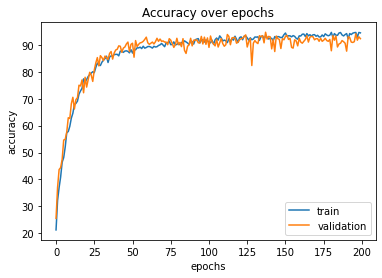

In [81]:
plt.plot(np.array(history.history['accuracy']) * 100)
plt.plot(np.array(history.history['val_accuracy']) * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.title('Accuracy over epochs')
plt.show()

In [82]:
scores = model.evaluate(X_test_new, y_test_new)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

23/23 [==============================] - 0s 17ms/step - loss: 0.2199 - accuracy: 0.9313
Test loss: 0.21994774043560028
Test accuracy: 0.9312763214111328


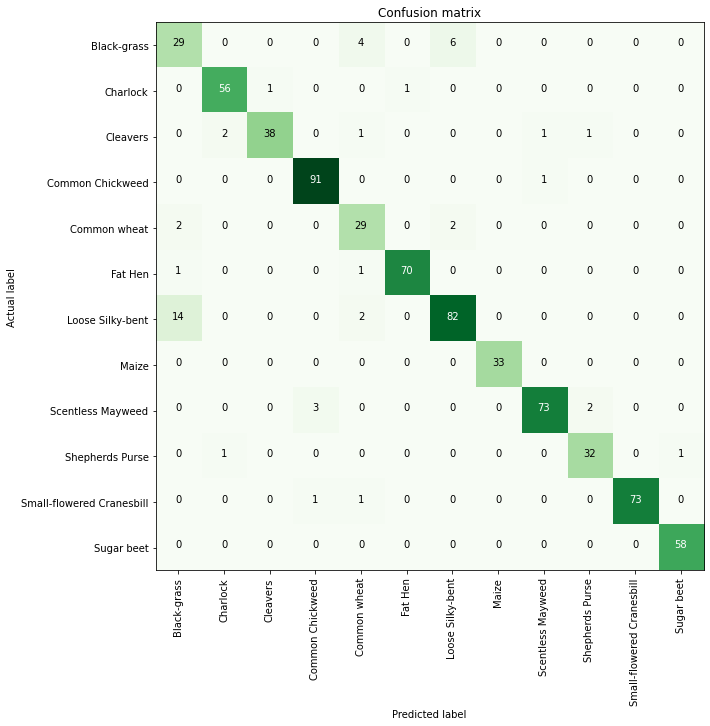

In [83]:
# Predict the values from the test data
y_pred = model.predict(X_test_new)
y_pred_Classes = np.argmax(y_pred, axis = 1) 
trueY = np.argmax(y_test_new, axis = 1) 

# confusion matrix
confusionMTX = confusion_matrix(trueY, y_pred_Classes) 

# plot the confusion matrix
plot_confusion_matrix(confusionMTX, classes = labels.classes_) 


In [84]:
#Final score and accuracy of the model

score, acc = model.evaluate(X_test_new,y_test_new)
score1, acc1 = model.evaluate(X_train,y_train)
print('Test score:', score,'   Test accuracy:', acc)
print('Train score:', score1,'   Train accuracy:',acc1)



104/104 [==============================] - 2s 18ms/step - loss: 0.1247 - accuracy: 0.9510
Test score: 0.21994774043560028    Test accuracy: 0.9312763214111328
Train score: 0.12473716586828232    Train accuracy: 0.9509774446487427


In [ ]:
test_images_path = "./temp_train/test/*.png"

test_images = glob(test_images_path)
test_images_arr = []
test_files = []

for img in test_images:

    i = cv2.resize(cv2.imread(img), (128, 128))
    test_files.append(img.split('/')[-1])

    # Blurred image
    blurr = cv2.GaussianBlur(i,(5,5),0)

    # HSV image
    hsv = cv2.cvtColor(blurr,cv2.COLOR_BGR2HSV)

    #Green Parameters
    sensitivity = 35
    lower  = np.array([60 - sensitivity, 100, 50])
    upper = np.array([60 + sensitivity, 255, 255])
    
    #Masked image
    mask = cv2.inRange(hsv,lower,upper)
    struc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    mask = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,struc)
    
    #Boolean image
    boolean = mask>0
    new = np.zeros_like(i,np.uint8)
    new[boolean] = i[boolean]
    test_images_arr.append(new)

test_X = np.asarray(test_images_arr)

# Normalization of the Image Data
test_X = test_X.astype('float32') / 255


In [85]:
predictions = model.predict(test_X)
preds = np.argmax(predictions, axis=1)
pred_str = labels.classes_[preds]


final_predictions = {'file':test_files, 'species':pred_str}
final_predictions = pd.DataFrame(final_predictions)
final_predictions.to_csv("./temp_train/submission.csv", index=False)


Model 5 has 95% on training accuracy and 93% on testing accuracy. 

 

# CNN Model 6 

*   6 convolution layers (filters=64/64/128/128/256/256, kernel_size=(3, 3) activation='relu')
*   MaxPool2D((2, 2) 
*   Dropout(0.25)
*   GlobalMaxPool2D
*   Flatten
*   3 dense layers (256/256/256, activation='relu')
*   Dropout(0.25)
*   loss='categorical_crossentropy', optimizer='adam'
*   model compile with ImageDataGenerator to minimize overfitting.
*   shuffle = True 



In [36]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(128, 128, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.25))

model.add(GlobalMaxPool2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 58, 58, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 128)      

In [37]:
generator = ImageDataGenerator(rotation_range = 180,
                               zoom_range = 0.2,
                               width_shift_range = 0.2,
                               height_shift_range = 0.2,
                               horizontal_flip = True,
                               vertical_flip = True)
generator.fit(X_train)

In [38]:
history = model.fit(generator.flow(X_train,y_train,batch_size=64),epochs=200, verbose=2,shuffle=True,validation_data=(X_val,y_val))
pd.DataFrame(history.history)

Epoch 1/200
52/52 - 27s - loss: 2.3122 - accuracy: 0.2060 - val_loss: 2.1222 - val_accuracy: 0.2598
Epoch 2/200
52/52 - 20s - loss: 2.0210 - accuracy: 0.2857 - val_loss: 1.9450 - val_accuracy: 0.3118
Epoch 3/200
52/52 - 20s - loss: 1.8253 - accuracy: 0.3230 - val_loss: 1.7221 - val_accuracy: 0.3666
Epoch 4/200
52/52 - 20s - loss: 1.7384 - accuracy: 0.3519 - val_loss: 1.7406 - val_accuracy: 0.3581
Epoch 5/200
52/52 - 20s - loss: 1.7093 - accuracy: 0.3783 - val_loss: 1.6390 - val_accuracy: 0.3820
Epoch 6/200
52/52 - 20s - loss: 1.6262 - accuracy: 0.4117 - val_loss: 1.5012 - val_accuracy: 0.4565
Epoch 7/200
52/52 - 20s - loss: 1.5181 - accuracy: 0.4541 - val_loss: 1.6382 - val_accuracy: 0.3904
Epoch 8/200
52/52 - 20s - loss: 1.4046 - accuracy: 0.4920 - val_loss: 1.3666 - val_accuracy: 0.4663
Epoch 9/200
52/52 - 20s - loss: 1.2857 - accuracy: 0.5287 - val_loss: 1.3254 - val_accuracy: 0.5211
Epoch 10/200
52/52 - 20s - loss: 1.2171 - accuracy: 0.5669 - val_loss: 1.3020 - val_accuracy: 0.5421

,loss,accuracy,val_loss,val_accuracy
0,2.312245,0.206015,2.122170,0.259831
1,2.020957,0.285714,1.944970,0.311798
2,1.825314,0.323008,1.722112,0.366573
3,1.738399,0.351880,1.740567,0.358146
4,1.709327,0.378346,1.638955,0.382022
...,...,...,...,...
195,0.212120,0.915789,0.203023,0.912921
196,0.230849,0.909474,0.213851,0.910112
197,0.220797,0.915188,0.338516,0.859551
198,0.220384,0.918797,0.200517,0.921348


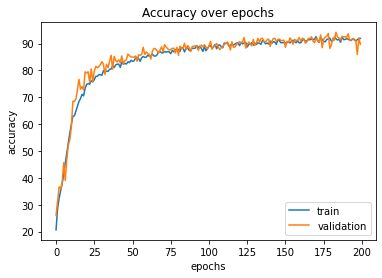

In [40]:
plt.plot(np.array(history.history['accuracy']) * 100)
plt.plot(np.array(history.history['val_accuracy']) * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.title('Accuracy over epochs')
plt.show()

In [39]:
scores = model.evaluate(X_test_new, y_test_new)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

23/23 [==============================] - 1s 64ms/step - loss: 0.2641 - accuracy: 0.8822
Test loss: 0.2641092538833618
Test accuracy: 0.8821879625320435


In [41]:
# confusion matrix function

def plot_confusion_matrix(cm, classes, normalize=False,title='Confusion matrix',cmap=plt.cm.Greens):
    
    fig = plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

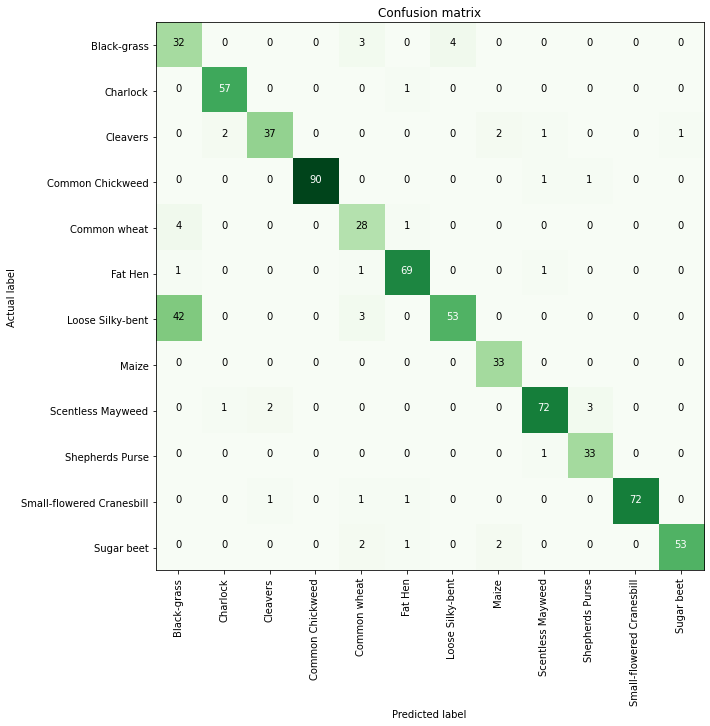

In [42]:
# Predict the values from the test data
y_pred = model.predict(X_test_new)
y_pred_Classes = np.argmax(y_pred, axis = 1) 
trueY = np.argmax(y_test_new, axis = 1) 

# confusion matrix
confusionMTX = confusion_matrix(trueY, y_pred_Classes) 

# plot the confusion matrix
plot_confusion_matrix(confusionMTX, classes = labels.classes_) 

In [43]:
#Final score and accuracy of the model

score, acc = model.evaluate(X_test_new,y_test_new)
score1, acc1 = model.evaluate(X_train,y_train)
print('Test score:', score,'   Test accuracy:', acc)
print('Train score:', score1,'   Train accuracy:',acc1)

104/104 [==============================] - 6s 58ms/step - loss: 0.1781 - accuracy: 0.9083
Test score: 0.2641092538833618    Test accuracy: 0.8821879625320435
Train score: 0.17809703946113586    Train accuracy: 0.9082706570625305


In [44]:
test_images_path = "./temp_train/test/*.png"

test_images = glob(test_images_path)
test_images_arr = []
test_files = []

for img in test_images:

    i = cv2.resize(cv2.imread(img), (128, 128))
    test_files.append(img.split('/')[-1])

    # Blurred image
    blurr = cv2.GaussianBlur(i,(5,5),0)

    # HSV image
    hsv = cv2.cvtColor(blurr,cv2.COLOR_BGR2HSV)

    #Green Parameters
    sensitivity = 35
    lower  = np.array([60 - sensitivity, 100, 50])
    upper = np.array([60 + sensitivity, 255, 255])
    
    #Masked image
    mask = cv2.inRange(hsv,lower,upper)
    struc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    mask = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,struc)
    
    #Boolean image
    boolean = mask>0
    new = np.zeros_like(i,np.uint8)
    new[boolean] = i[boolean]
    test_images_arr.append(new)

test_X = np.asarray(test_images_arr)

# Normalization of the Image Data
test_X = test_X.astype('float32') / 255

In [45]:
predictions = model.predict(test_X)
preds = np.argmax(predictions, axis=1)
pred_str = labels.classes_[preds]


final_predictions = {'file':test_files, 'species':pred_str}
final_predictions = pd.DataFrame(final_predictions)
final_predictions.to_csv("./temp_train/submission.csv", index=False)